# Positions plot for Weiss et al. 2020 3DCORE 


In [1]:
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import  DateFormatter
from datetime import timedelta
import seaborn as sns
import datetime
import astropy
import astropy.constants as const
from sunpy.time import parse_time
import time
import pickle
import sys
import os
import urllib
import json
import importlib
import pandas as pd
import copy
import openpyxl
import h5py
import heliopy.data.spice as spicedata
import heliopy.spice as spice
import heliosat

#because script is not in root directory of package
sys.path.append('/Users/chris/python/heliocats')
import heliocats.data as hd


from astropy.constants import au
#define AU in km
AU=au.value/1e3

## load in situ data and positions

In [2]:

[psp, bepi, solo, sta, earth, venus, mars, mercury,frame]= \
      pickle.load( open( '../data/positions_psp_solo_bepi_sta_planets_HEEQ_1hour.p', "rb" ))

### Make plot

HEEQ
current frame_time_num 2018-11-12 00:00:00+00:00


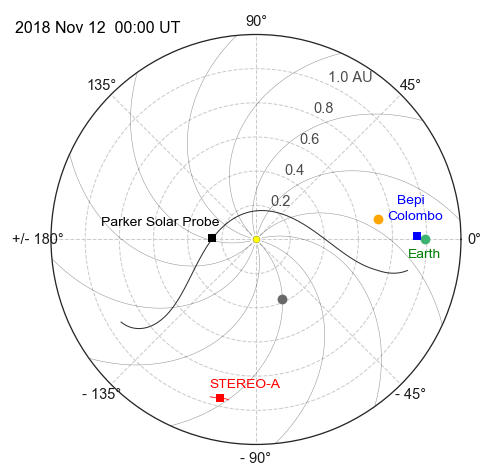

In [66]:
sns.set_context("talk")     
#sns.set_style('darkgrid')
sns.set_style('whitegrid')
sns.set_style("ticks",{'grid.linestyle': '--'})


plt.figure(1,figsize=(10, 10),dpi=50)

ax3 = plt.subplot2grid((1, 1), (0, 0),projection='polar') 


#########################################################################
backcolor='black'
psp_color='black'
bepi_color='blue'
solo_color='coral'

symsize_planet=200
symsize_spacecraft=150
fsize=20
plot_orbit=True
fadeind=150

plot_parker=True

AUkm=149597870.7   

#for parker spiral   
theta=np.arange(0,np.deg2rad(180),0.01)

#Coordinate System
#frame='HCI'
frame='HEEQ'
print(frame)

#sidereal solar rotation rate
if frame=='HCI': sun_rot=24.47
#synodic
if frame=='HEEQ': sun_rot=26.24

frame_time_num=mdates.date2num(parse_time('2018-Nov-12').datetime)
print( 'current frame_time_num', str(mdates.num2date(frame_time_num)))

#these have their own times
dct=frame_time_num-psp.time
psp_timeind=np.argmin(abs(dct))

dct=frame_time_num-bepi.time
bepi_timeind=np.argmin(abs(dct))

dct=frame_time_num-solo.time
solo_timeind=np.argmin(abs(dct))

dct=frame_time_num-sta.time
sta_timeind=np.argmin(abs(dct))

#all same times
dct=frame_time_num-earth.time
earth_timeind=np.argmin(abs(dct))


ax3.scatter(venus.lon[earth_timeind], venus.r[earth_timeind]*np.cos(venus.lat[earth_timeind]), s=symsize_planet, c='orange', alpha=1,lw=0,zorder=3)
ax3.scatter(mercury.lon[earth_timeind], mercury.r[earth_timeind]*np.cos(mercury.lat[earth_timeind]), s=symsize_planet, c='dimgrey', alpha=1,lw=0,zorder=3)
ax3.scatter(earth.lon[earth_timeind], earth.r[earth_timeind]*np.cos(earth.lat[earth_timeind]), s=symsize_planet, c='mediumseagreen', alpha=1,lw=0,zorder=3)
ax3.scatter(sta.lon[earth_timeind], sta.r[earth_timeind]*np.cos(sta.lat[earth_timeind]), s=symsize_spacecraft, c='red', marker='s', alpha=1,lw=0,zorder=3)
ax3.scatter(mars.lon[earth_timeind], mars.r[earth_timeind]*np.cos(mars.lat[earth_timeind]), s=symsize_planet, c='orangered', alpha=1,lw=0,zorder=3)

ax3.scatter(psp.lon[psp_timeind], psp.r[psp_timeind]*np.cos(psp.lat[psp_timeind]), s=symsize_spacecraft, c=psp_color, marker='s', alpha=1,lw=0,zorder=3)
ax3.scatter(bepi.lon[bepi_timeind], bepi.r[bepi_timeind]*np.cos(bepi.lat[bepi_timeind]), s=symsize_spacecraft, c=bepi_color, marker='s', alpha=1,lw=0,zorder=3)
 

#parker spiral
if plot_parker:
    for q in np.arange(0,12):
        omega=2*np.pi/(sun_rot*60*60*24) #solar rotation in seconds
        v=400/AUkm #km/s
        r0=695000/AUkm
        r=v/omega*theta+r0*7
        ax3.plot(-theta+np.deg2rad(0+(360/24.47)*1+360/12*q), r, alpha=0.4, lw=0.8,color='black',zorder=1)

#set axes and grid
ax3.set_theta_zero_location('E')
#plt.thetagrids(range(0,360,45),(u'0\u00b0 '+frame+' longitude',u'45\u00b0',u'90\u00b0',u'135\u00b0',u'+/- 180\u00b0',u'- 135\u00b0',u'- 90\u00b0',u'- 45\u00b0'), ha='right', fmt='%d',fontsize=fsize-1,color=backcolor, alpha=0.9)
plt.thetagrids(range(0,360,45),(u'0\u00b0',u'45\u00b0',u'90\u00b0',u'135\u00b0',u'+/- 180\u00b0',u'- 135\u00b0',u'- 90\u00b0',u'- 45\u00b0'), ha='center', fmt='%d',fontsize=fsize+1,color=backcolor, alpha=0.9,zorder=4)

#plt.rgrids((0.10,0.39,0.72,1.00,1.52),('0.10','0.39','0.72','1.0','1.52 AU'),angle=125, fontsize=fsize,alpha=0.9, color=backcolor)
plt.rgrids((0.2,0.4,0.6,0.8,1.0),('0.2','0.4','0.6','0.8','1.0 AU'),angle=65, fontsize=fsize+1,alpha=0.7, color=backcolor)

#ax.set_ylim(0, 1.75) #with Mars
ax3.set_ylim(0, 1.2) 

#Sun
ax3.scatter(0,0,s=100,c='yellow',alpha=1, edgecolors='black', linewidth=0.3)


fadeind=60*24
ax3.plot(psp.lon[psp_timeind-fadeind:psp_timeind+fadeind], psp.r[psp_timeind-fadeind:psp_timeind+fadeind]*np.cos(psp.lat[psp_timeind-fadeind:psp_timeind+fadeind]), c=psp_color, alpha=0.8,lw=1.5,zorder=3)
ax3.plot(sta.lon[sta_timeind-fadeind:sta_timeind+fadeind], sta.r[sta_timeind-fadeind:sta_timeind+fadeind]*np.cos(sta.lat[sta_timeind-fadeind:sta_timeind+fadeind]), c='red', alpha=0.8,lw=1.5,zorder=3)




#spacecraft labels
plt.annotate('Parker Solar Probe', (0.33,0.54), color=psp_color, ha='center',fontsize=fsize,verticalalignment='top',xycoords='figure fraction')
ax3.text(bepi.lon[bepi_timeind]+0.26,bepi.r[bepi_timeind],'Bepi', color=bepi_color, ha='center',fontsize=fsize,verticalalignment='top')
ax3.text(bepi.lon[bepi_timeind]+0.16,bepi.r[bepi_timeind],'Colombo', color=bepi_color, ha='center',fontsize=fsize,verticalalignment='top')
ax3.text(sta.lon[sta_timeind]+0.14,sta.r[sta_timeind]-0.14,'STEREO-A', color='red', ha='center',fontsize=fsize,verticalalignment='top')
ax3.text(earth.lon[earth_timeind]-0.05,earth.r[earth_timeind],'Earth', color='green', ha='center',fontsize=fsize,verticalalignment='top')


#time
plt.annotate(mdates.num2date(frame_time_num).strftime("%Y %b %d  %H:%M")+' UT',(0.03,0.93),fontsize=fsize+3, ha='left',c='black',xycoords='figure fraction')
#plt.title(mdates.num2date(frame_time_num).strftime("%Y %b %d  %H:%M")+' UT',color='black',fontsize=25)

plt.tight_layout()


#plt.savefig('../results/weiss_2020/40_positions_dark.png',dpi=100)
#plt.savefig('../results/weiss_2020/40_positions_dark.pdf')

plt.savefig('../results/weiss_2020/40_positions_white.png',dpi=200)
plt.savefig('../results/weiss_2020/40_positions_white.pdf')